### Imbalance Data:
-   classification me sab se bara problem imbalance data ka hota hy.
-   imbalance me one category ka data ziayda a jata hy. or hmara model
-   us pr train ho jata hy or baised ban jata hy(means k kisi particular 1 he category ko represent krta hy.)

An imbalanced dataset occurs when one class has significantly more samples than the other classes, especially in classification tasks. This is common in real-world applications, where positive cases (e.g., fraud, disease) are often much rarer than negative cases (e.g., non-fraudulent transactions, healthy patients). For example, in a dataset of 10,000 email samples for spam classification, if only 500 emails are spam and the remaining 9,500 are non-spam, the dataset is heavily imbalanced toward the "non-spam" class.

### **Challenges with Imbalanced Datasets**

Imbalanced datasets present unique challenges because many machine learning algorithms assume that classes are roughly balanced, which can lead to:

**Biased Predictions:** The model may lean toward the majority class and ignore the minority class, leading to high accuracy but poor performance in detecting minority class samples.

**Misleading Accuracy:** High accuracy can be misleading since a model that simply predicts the majority class will have high accuracy but will fail to identify minority class cases. For example, a model that predicts all emails as non-spam in a highly imbalanced spam dataset might still achieve 95% accuracy, but its spam detection performance is effectively zero.

In [1]:
from IPython.display import Image

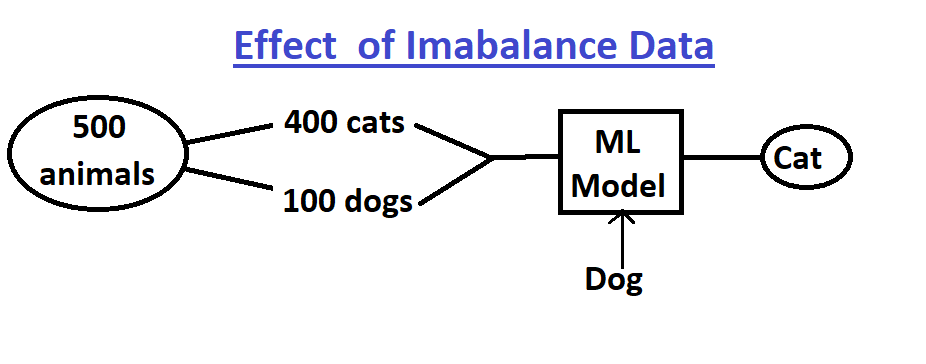

In [2]:
Image(filename="imbalance_dataset_effect.png")

### **How to Handle Imbalance Data**
1. Random under Sampling
2. Random Over Sampling

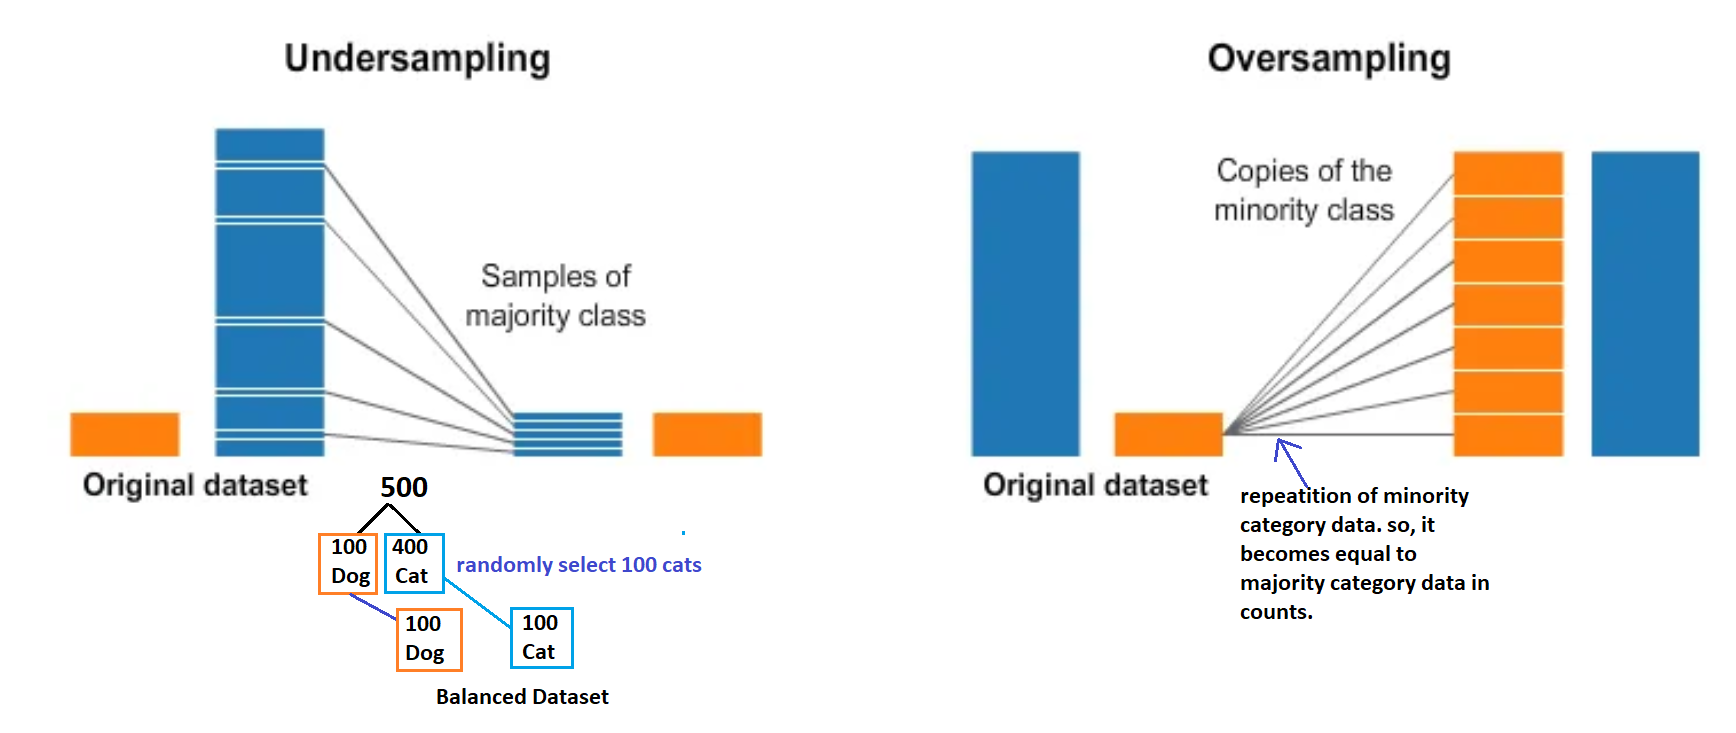

In [3]:
Image(filename="handling_imbalance_data.png")

In [1]:
import pandas as pd

In [ ]:
ds = pd.read_csv("Social_Network_Ads.csv")
ds

In [ ]:
ds["Purchased"].value_counts()

In [5]:
x = ds.iloc[:,:-1]
y = ds["Purchased"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

In [10]:
lr.score(x_test, y_test)*100

81.25

In [11]:
from sklearn.metrics import confusion_matrix

In [14]:
y_pred= lr.predict(x_test)
cmr = confusion_matrix(y_test, y_pred)

In [ ]:
import seaborn as sns
sns.heatmap(data=cmr, annot=True)

In [ ]:
lr.predict([[18, 82000]])

In [ ]:
# !pip install imblearn

In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [9]:
rus = RandomUnderSampler()

In [10]:

ru_x, ru_y = rus.fit_resample(x,y)

In [11]:
ru_y.value_counts()

Purchased
0    143
1    143
Name: count, dtype: int64

In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
ros = RandomOverSampler()

In [14]:
ros_x, ros_y = ros.fit_resample(x,y)

In [15]:
ros_y.value_counts()

Purchased
0    257
1    257
Name: count, dtype: int64

In [ ]:
lr.fit(ros_x, ros_y)

In [ ]:
lr.score(x_test,y_test)